In [1]:
# importing some basic libraries

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('Glass Identification.csv',names=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Target'])

In [72]:
df


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Target  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


So here we have 214 entries zero null values are present

In [74]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Id
1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: count, Length: 214, dtype: int64


RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64


Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64


Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64


Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64


K
0.00    30
0.57    1

In [75]:
df.Target.value_counts()

Target
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In target col we have 6 classes

In [76]:
df.isnull().sum()

Id        0
RI        0
Na        0
Mg        0
Al        0
Si        0
K         0
Ca        0
Ba        0
Fe        0
Target    0
dtype: int64

In [77]:
df.nunique()

Id        214
RI        178
Na        142
Mg         94
Al        118
Si        133
K          65
Ca        143
Ba         34
Fe         32
Target      6
dtype: int64

In [78]:
df.nunique().to_frame('unique values')

,unique values
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


Here In Id col all the values are unique. and also this col has of no use 

In [79]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [80]:
corr=df.corr()
corr

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
Id,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


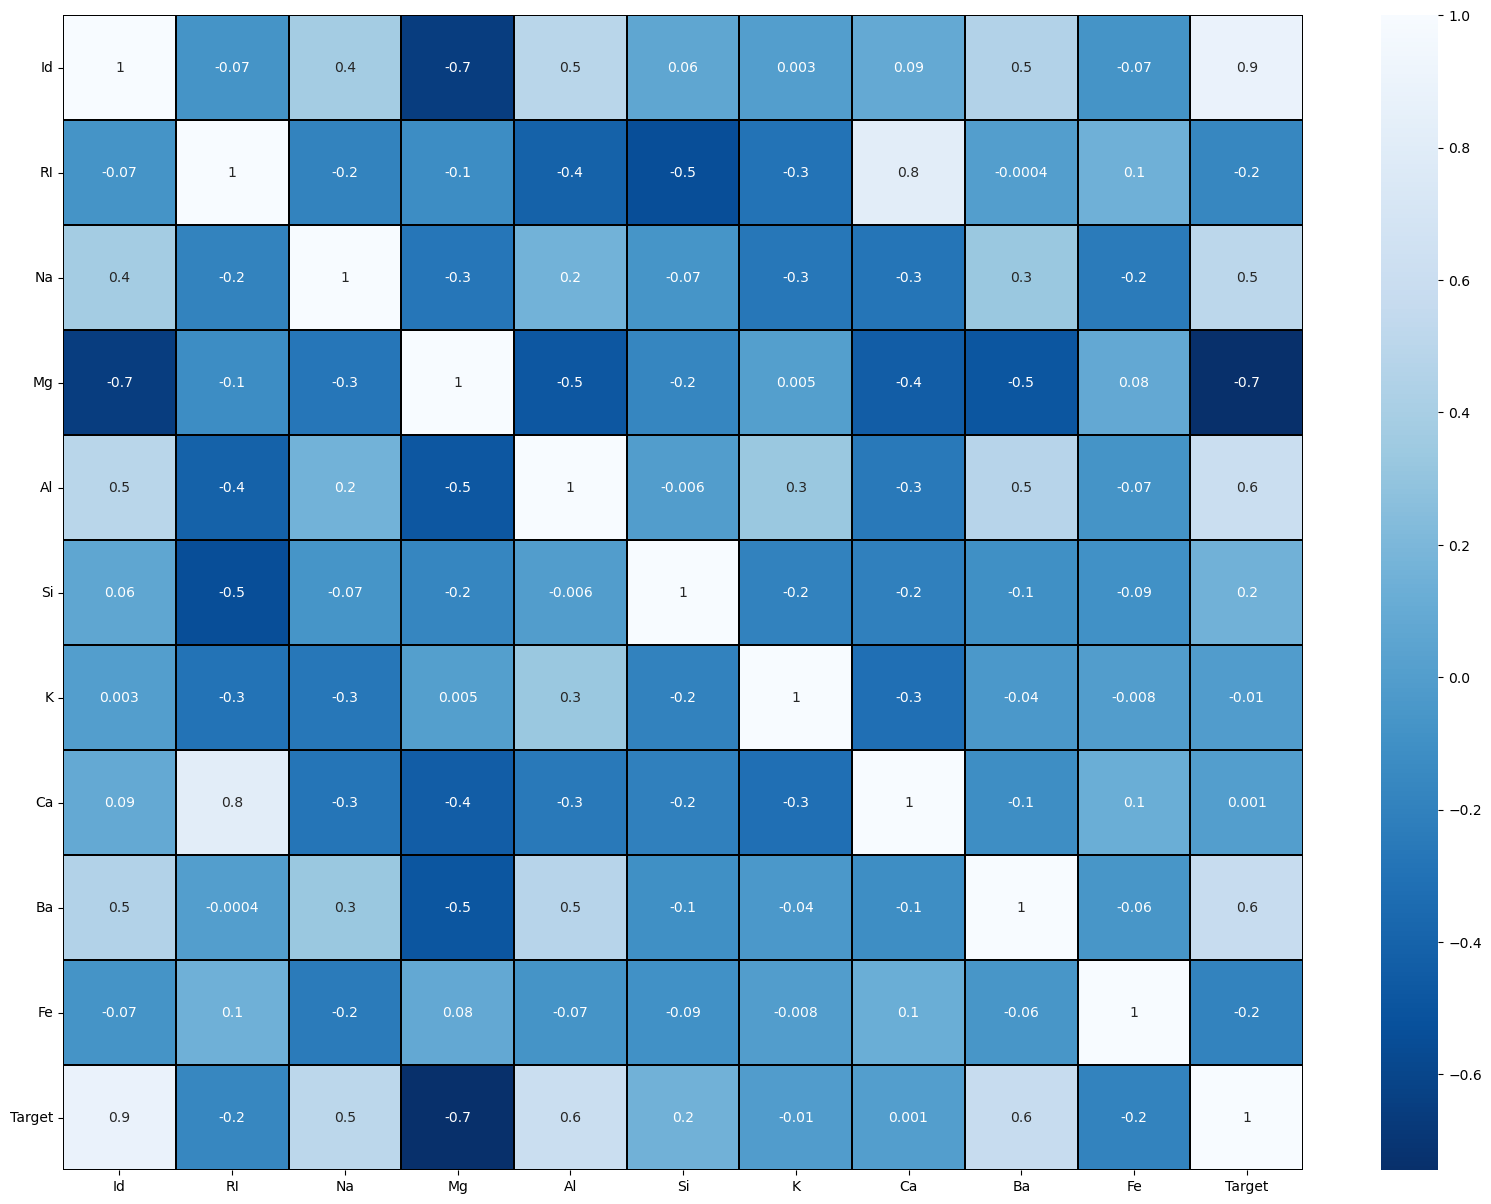

In [81]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidth=.1,fmt=".1g",annot=True,linecolor='black',cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

In [82]:
df.corr()['Target'].sort_values(ascending=False).to_frame()

,Target
Target,1.000000
Id,0.877357
Al,0.598829
Ba,0.575161
Na,0.502898
Si,0.151565
Ca,0.000952
K,-0.010054
RI,-0.164237
Fe,-0.188278


Ca col has very less correlation with the target variable and Al,Ba,Na col has very high correlation with the target variable

In [2]:
# Dropping the Id col because this has no importance in this case

In [83]:
df.drop('Id',axis=1,inplace=True)

In [84]:
df.corr()['Target'].sort_values(ascending=False).to_frame()

,Target
Target,1.000000
Al,0.598829
Ba,0.575161
Na,0.502898
Si,0.151565
Ca,0.000952
K,-0.010054
RI,-0.164237
Fe,-0.188278
Mg,-0.744993


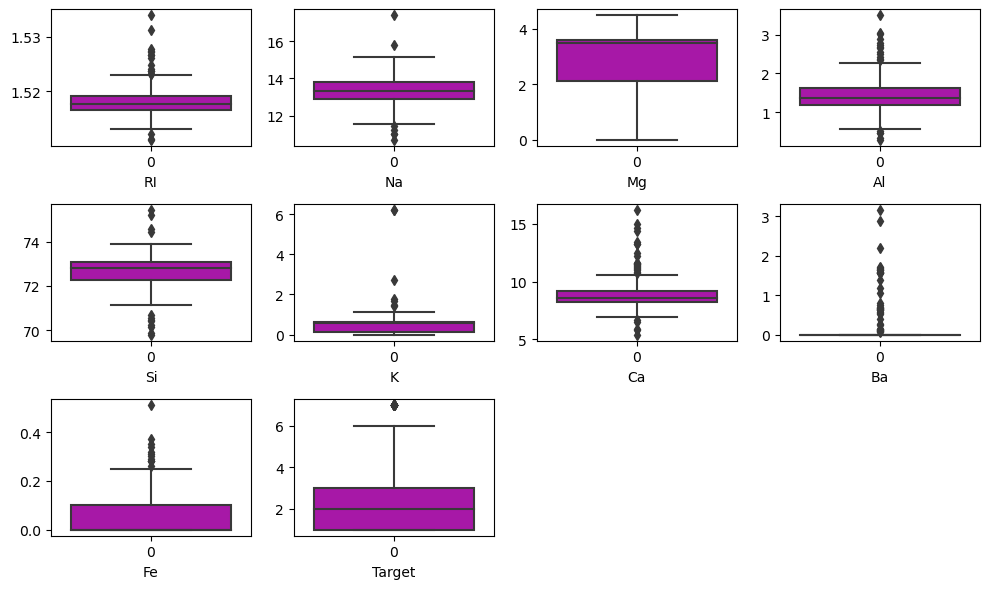

In [85]:
#creating boxplot
plt.figure(figsize=(10,6),facecolor='white')
p=1
for i in df.columns:
    if p<=11:
        ax=plt.subplot(3,4,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

Ba,Ca,Si,Al col has outliers present as we can see in the boxplot

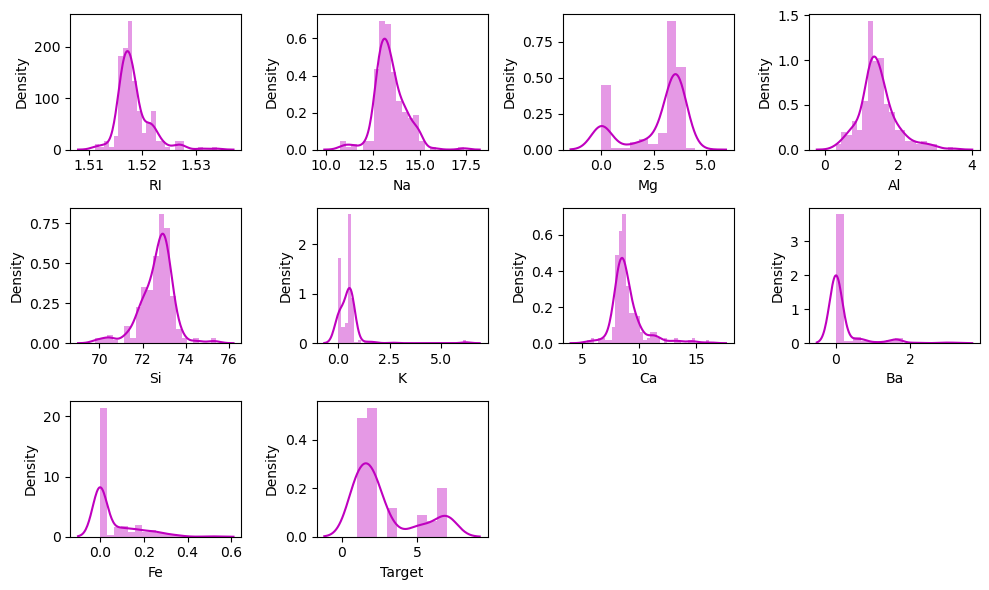

In [86]:
#creating distplot
plt.figure(figsize=(10,6),facecolor='white')
p=1
for i in df.columns:
    if p<=11:
        ax=plt.subplot(3,4,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

So here we can see that except Na col every col has skewness and K,Ca,Ba and Fe col has very skewness present 

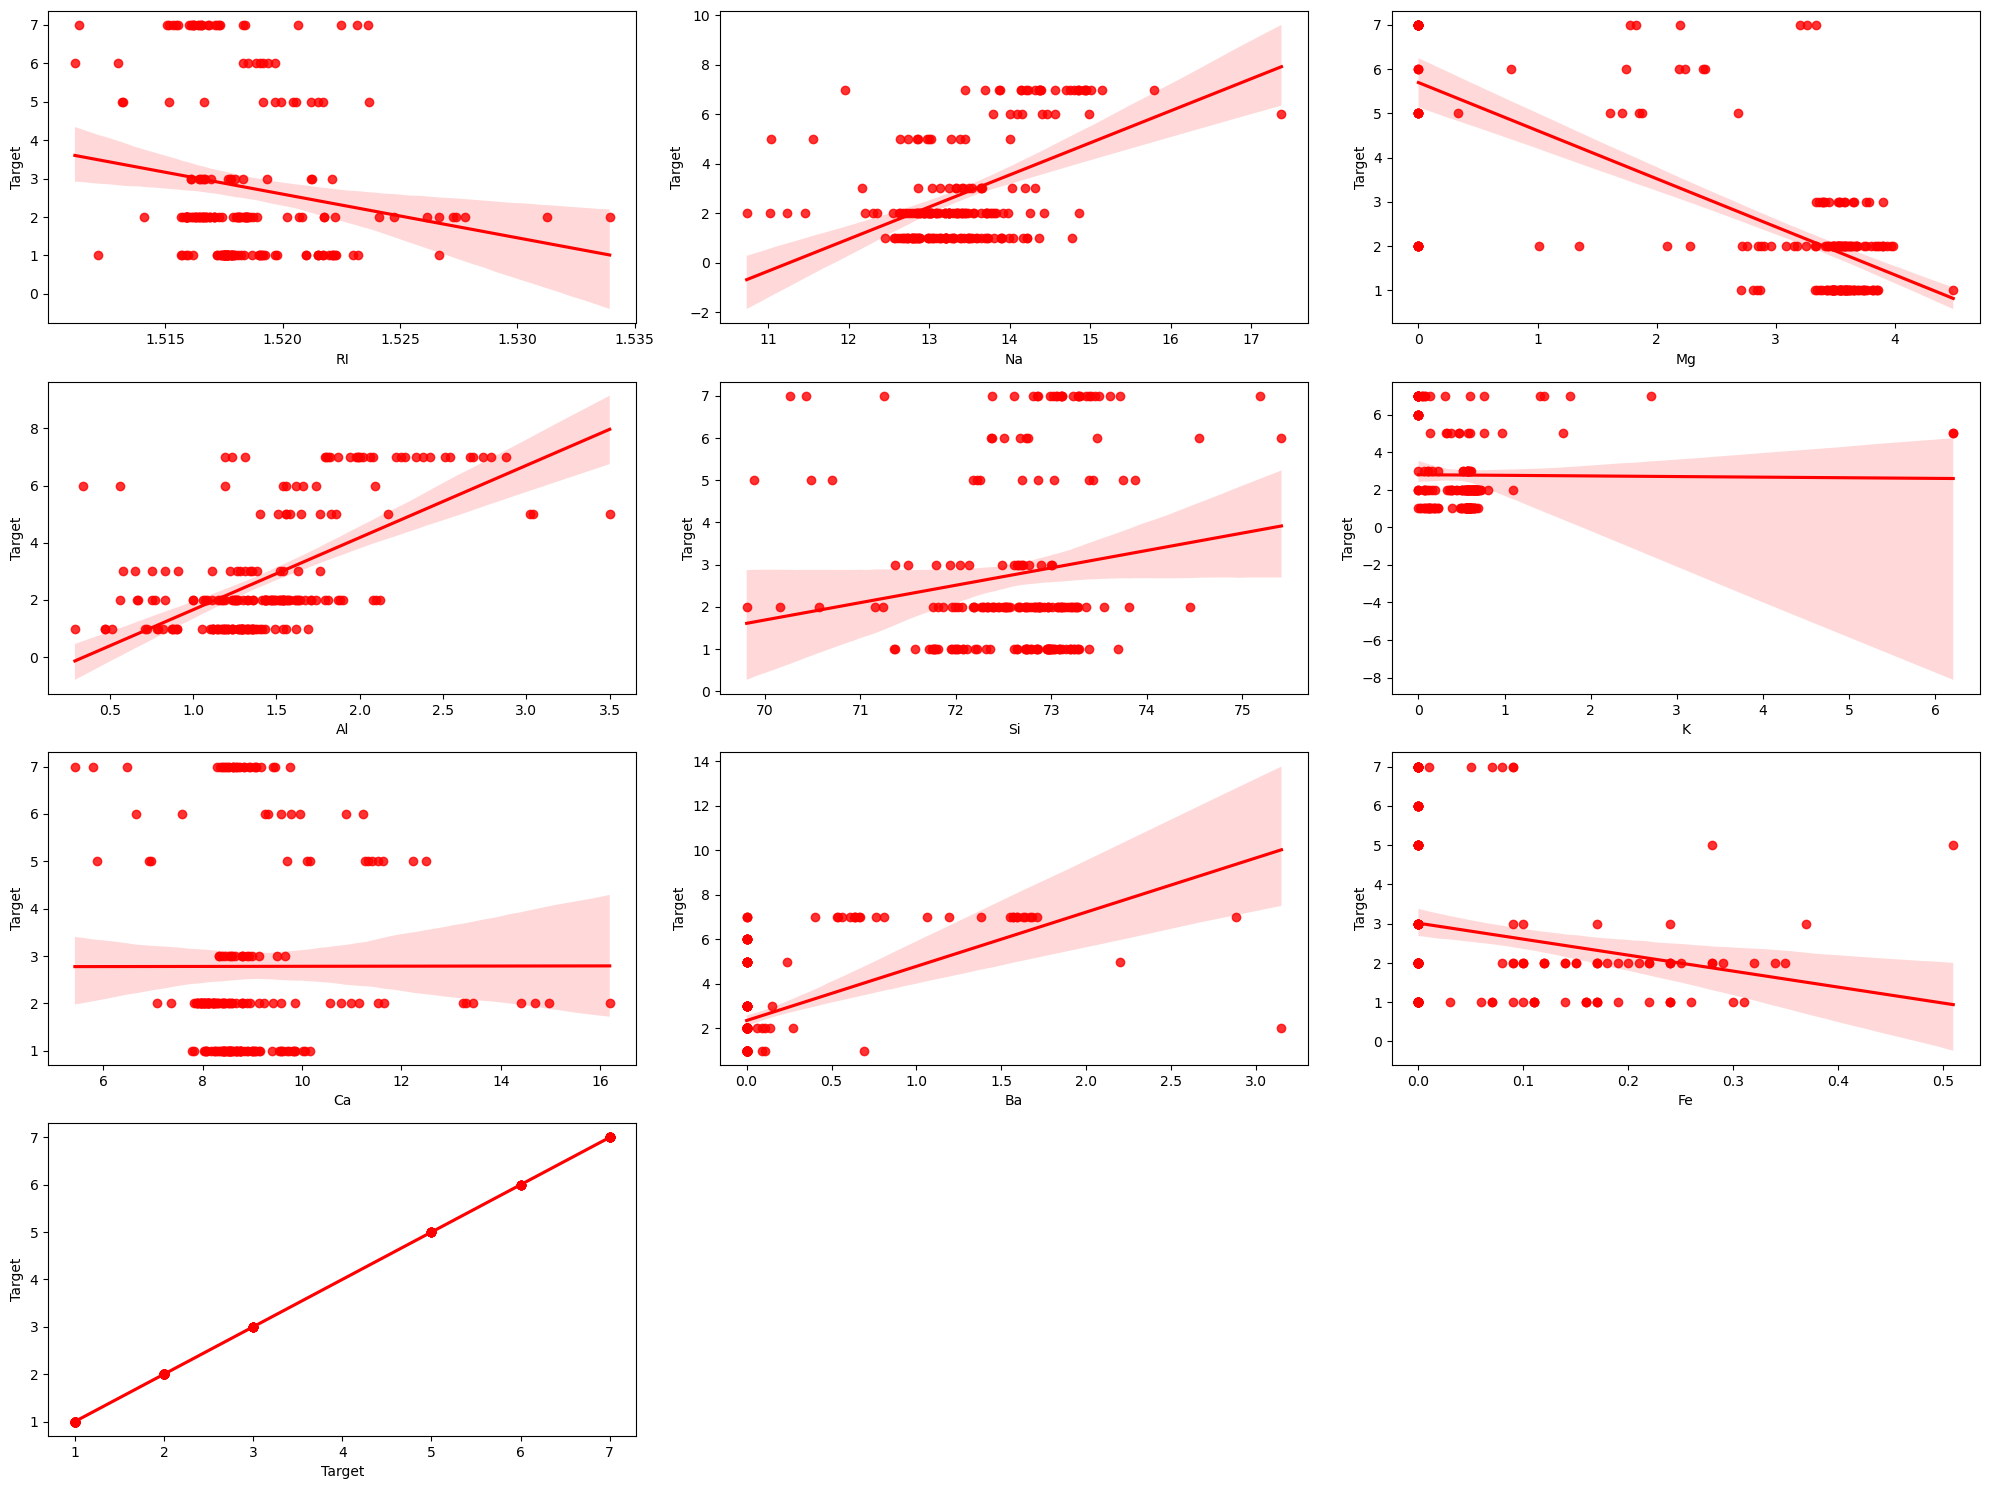

In [87]:
#creating regplot
plt.figure(figsize=(20,15),facecolor='white')
p=1
for i in df.columns:
    if p<=11:
        ax=plt.subplot(4,3,p)
        sns.regplot(x=i,y="Target",data=df,color='r')
        plt.xlabel(i)
        plt.yticks(rotation=0)
    p+=1

plt.tight_layout()

In [88]:
df.skew()

RI        1.625431
Na        0.454181
Mg       -1.152559
Al        0.907290
Si       -0.730447
K         6.551648
Ca        2.047054
Ba        3.416425
Fe        1.754327
Target    1.114915
dtype: float64

So here we can see that except Na col every col has skewness and K,Ca,Ba and Fe col has very skewness present 

In [89]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Target'], dtype='object')

In [90]:
a=['RI', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [3]:
# Removing skewness by using cuberoot method

In [91]:
for i in a:
    df[i]=np.cbrt(df[i])

In [92]:
df.skew()

RI        1.617049
Na        0.454181
Mg       -1.440196
Al       -0.204132
Si       -0.776908
K        -0.591896
Ca        1.407358
Ba        2.073007
Fe        0.894683
Target    1.114915
dtype: float64

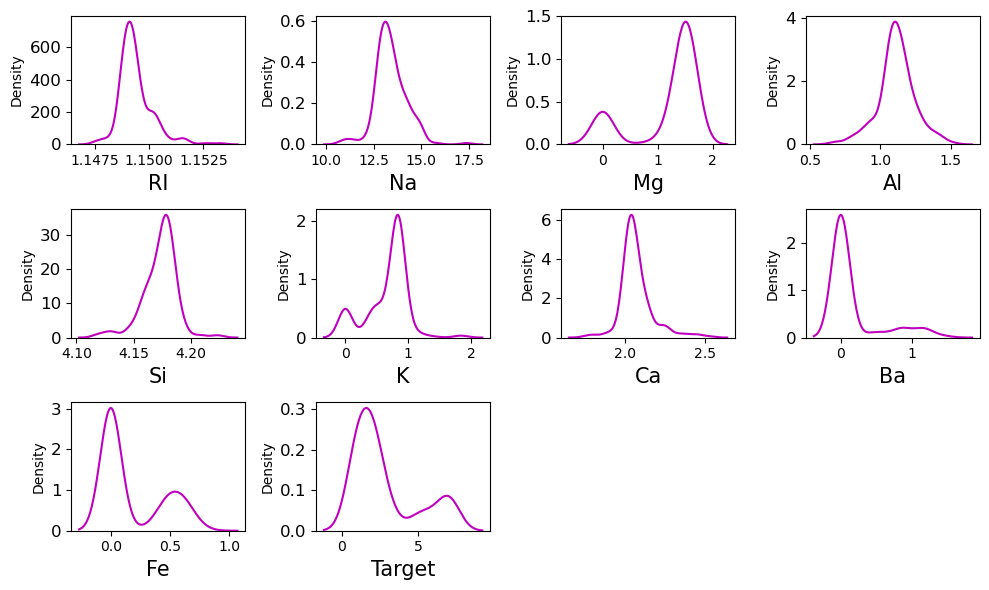

In [93]:
# Lets check the outliers by plotting the kde
plt.figure(figsize=(10,6),facecolor='white')
plotnumber =1
for col in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.kdeplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation =0,fontsize=12)
    plotnumber += 1
plt.tight_layout()

Skewness is almost removed

In [94]:
b=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [4]:
# removing outliers by using zscore method

In [95]:
from scipy.stats import zscore

In [96]:
curr=df[b]
z= np.abs(zscore(curr))

In [97]:
df_new=df[(z<3).all(axis=1)]
df_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1.150034,13.64,1.649740,1.032280,4.155926,0.391487,2.060643,0.000000,0.0,1
1,1.149176,13.89,1.532619,1.107932,4.174180,0.782974,1.985732,0.000000,0.0,1
2,1.148815,13.53,1.525490,1.154800,4.179148,0.730614,1.981496,0.000000,0.0,1
3,1.149189,13.21,1.545286,1.088587,4.171883,0.829134,2.018168,0.000000,0.0,1
4,1.149129,13.27,1.535452,1.074337,4.180865,0.819321,2.005816,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.148828,14.14,0.000000,1.422757,4.171883,0.430887,2.093860,1.019613,0.0,7
210,1.148985,14.92,0.000000,1.257818,4.180484,0.000000,2.032793,1.167165,0.0,7
211,1.149943,14.36,0.000000,1.264107,4.187339,0.000000,2.036014,1.179274,0.0,7
212,1.148899,14.38,0.000000,1.247194,4.190948,0.000000,2.039226,1.162251,0.0,7


Previously we have 214 entries now we have 200 entries. thats mean 14 entries has been removed due to outliers present in these rows 

In [48]:
df=df_new

In [5]:
# Changing from multiclass clssification problem to binary class classification problem as per problem statement

In [98]:
df['Target'] = df['Target'].map({1 : 0, 2 :0, 3: 0,4:0,5: 1, 6: 1, 7: 1})

In [99]:
df.Target.value_counts()

Target
0    163
1     51
Name: count, dtype: int64

Now we have two classes but they are unbalanced 

In [6]:
# separating X and Y 

In [100]:
x=df.iloc[:,0:-1]

In [101]:
y=df.iloc[:,-1]

In [7]:
# using standard scaling method to convert our dataset into normal distribution ( mean = 0 & std = 1)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
st=StandardScaler()

In [104]:
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.873958,0.284953,0.759032,-0.634449,-1.124991,-0.835901,-0.107657,-0.439469,-0.679381
1,-0.248977,0.591817,0.563835,-0.057329,0.105556,0.346205,-0.841573,-0.439469,-0.679381
2,-0.721771,0.149933,0.551954,0.300216,0.440468,0.188105,-0.883072,-0.439469,-0.679381
3,-0.232451,-0.242853,0.584946,-0.204901,-0.049288,0.485589,-0.523791,-0.439469,-0.679381
4,-0.311778,-0.169205,0.568556,-0.313611,0.556214,0.455958,-0.644800,-0.439469,-0.679381
...,...,...,...,...,...,...,...,...,...
209,-0.705234,0.898681,-1.990475,2.344370,-0.049288,-0.716931,0.217776,2.317817,-0.679381
210,-0.500215,1.856097,-1.990475,1.086101,0.530501,-2.018006,-0.380508,2.716835,-0.679381
211,0.755138,1.168721,-1.990475,1.134079,0.992620,-2.018006,-0.348946,2.749579,-0.679381
212,-0.612638,1.193270,-1.990475,1.005054,1.235907,-2.018006,-0.317483,2.703545,-0.679381


In [8]:
# using SMOTE technique to balance our target variable

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
SM=SMOTE()

In [107]:
x1,y1=SM.fit_resample(x,y)

In [108]:
y1.value_counts(
    
)

Target
0    163
1    163
Name: count, dtype: int64

Now we have equal entries in target variable for both of the classes 

In [14]:
# Importing some basic classification algorithms and metrices 

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [10]:
# checking for the best random_state value

In [110]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best acc :',maxacc,  'random_state :',maxrs)   

best acc : 1.0 random_state : 6


so here as we can see for random_state = 6, we have best best accuracy

In [111]:
g=pd.DataFrame()
g['test']=y_test
g['pred']=pred
g

,test,pred
263,1,1
149,0,0
292,1,1
20,0,0
190,1,1
...,...,...
8,0,0
170,1,1
209,1,1
156,0,0


In [11]:
# splitting our dataset based on the best random_state value

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=maxrs)

In [113]:
x_train.shape

(260, 9)

In [114]:
y_train.shape

(260,)

In [115]:
y_test.shape

(66,)

In [116]:
x_test.shape

(66, 9)

In [13]:
# Importing some classification algorithms

In [117]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [15]:
# making their instances

In [118]:
RFC=RandomForestClassifier()
ET=ExtraTreesClassifier()
LR=LogisticRegression()
svc=SVC()
GBC=GradientBoostingClassifier()
ADC=AdaBoostClassifier()
BC=BaggingClassifier()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
MNB=MultinomialNB()
GNB=GaussianNB()

In [16]:
# creating a list of all instances named loop

In [119]:
loop = [RFC,ET,LR,svc,GBC,ADC,BC,DTC,KNN,GNB]

In [17]:
# Importing cross_val_score

In [120]:
from sklearn.model_selection import cross_val_score

In [19]:
# Importing auc_roc_score

In [121]:
from sklearn.metrics import roc_auc_score

In [20]:
# Runnig a loop for all selected algorithmns and comparing their cross_val_score with their accuracies

In [124]:
for i in loop:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('This is for :',i)
    print('accuracy will be :',roc_auc_score(y_test,pred))
    print('confusion matrix will be :','\n')
    print(confusion_matrix(y_test,pred))
    print('classification report will be :','\n')
    print(classification_report(y_test,pred))
    
    score= cross_val_score(i,x,y,cv=5,scoring='roc_auc')
    print('Cross val score will be :',score)
    print('Mean cv :',score.mean())
    print('Difference between cv and accuracy_score will be :',roc_auc_score(y_test,pred)-score.mean())
    print('\n')

This is for : RandomForestClassifier()
accuracy will be : 0.986842105263158
confusion matrix will be : 

[[28  0]
 [ 1 37]]
classification report will be : 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        38

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66

Cross val score will be : [1.         0.99242424 0.95       0.99573864 1.        ]
Mean cv : 0.9876325757575757
Difference between cv and accuracy_score will be : -0.0007904704944177166


This is for : ExtraTreesClassifier()
accuracy will be : 1.0
confusion matrix will be : 

[[28  0]
 [ 0 38]]
classification report will be : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        38

    accuracy         

So ExtraTrees model is the best model. Because mean cross_val_score is 0.99 and roc_auc_score is 1

In [21]:
# Importing Grid search CV for Hyper parameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV

In [22]:
# selecting all the parameters to check which parameters is the best

In [126]:
parameters = {'n_estimators':[100,150,200],'criterion':['gini','entropy','log_loss'],'n_jobs':[-1],'max_leaf_nodes':[2,4,5,None],'max_depth':[2,3,4,5,None]}

In [128]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)

In [129]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_leaf_nodes': [2, 4, 5, None],
                         'n_estimators': [100, 150, 200], 'n_jobs': [-1]})

In [130]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 150,
 'n_jobs': -1}

So these are the best parameters 

In [23]:
# Creating our final model based on the best parameters

In [131]:
final_model = ExtraTreesClassifier(criterion = "gini",max_depth=None,max_leaf_nodes=None,n_estimators=150,n_jobs=-1)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [132]:
# Plotting the Roc_curve

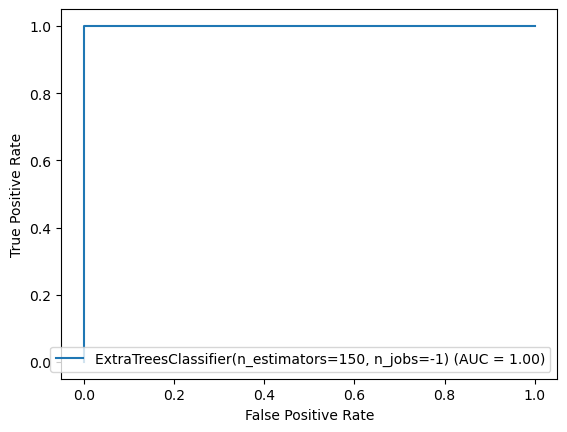

In [133]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [134]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,pred)
auc_score

1.0

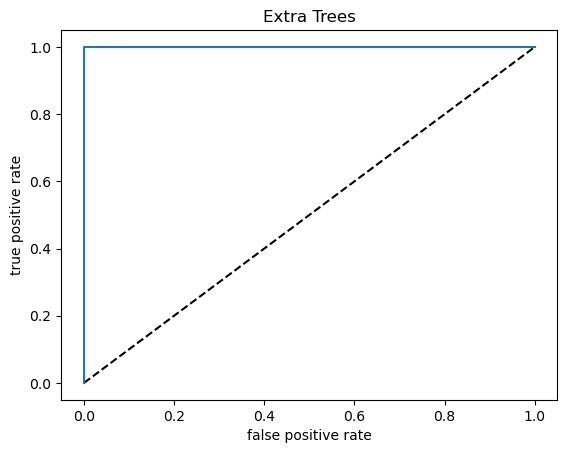

In [135]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ExtraTreesClassifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Extra Trees')
plt.show()

Lets test our model

In [136]:
t=np.array([0.873958,	0.284953,	0.759032,	-0.634449,	-1.124991,	-0.835901,	-0.107657,	-0.439469,	-0.679381]).reshape(1,-1)
final_model.predict(t)

array([0], dtype=int64)

In [138]:
#0

In [137]:
t=np.array([-0.705234,	0.898681,	-1.990475,	2.344370,	-0.049288,	-0.716931,	0.217776,	2.317817,	-0.679381]).reshape(1,-1)
final_model.predict(t)

array([1], dtype=int64)

In [139]:
#1